In [1]:
### El objetivo de este curso es el estudio de las técnicas de clasificación utilizadas en MS (sector financiero)
#
#  Tiene 4 partes:
#   - Clustering    (Ejemplo a replicar en https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)
#   - KNN
#   - Markov
#   - PCA (principales componentes algorithm)
#

In [2]:
# Imports necesarios

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np




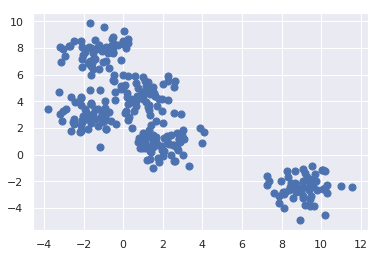

In [3]:
# Generamos una muestra aleatoria para los ejemplos:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


In [4]:
# 1.- CLUSTERING:

#   Es un ML no supervisado.
#
#   El clustering es subjetivo, y existen distintos algoritmos de clustering (p.e. K-Means, Spectral).
#
#   El output puede ayudar a descubrir estructura subyacente en el dato.
#
#   El principal problema es definir una metrica robusta y confiable (p.e. Euclidean, Manhattan, Minkowski,
#   Mahalanovis, Correlacion...)
#

In [5]:
# 1.1.- Analisis por K-Means:  

# Busca encontrar grupos en los datos. Primera vez encontrado en "Some methods for classification and 
# analysis of multivariate observations".

# Se aplica a datos que tienen un número bajo de dimensiones, son numéricos y continuos.

# Se define un número K de clusters, y el algoritmo encuentra K centroides y asigna a cada elemento de la muestra
# el centroide mas cercano (grupo).

# Se suele utilizar la metrica de la distancia Euclidea (sqrt(sum(x_i²))), pero se pueden usar otras.

# Algoritmo:
#  1- Partición de la muestra en K clusters.
#  2- Se computa el centroide de cada cluster.
#  3- Se asigna a cada punto su nuevo centroide.
#  4- Se repiten los pasos 2 y 3 hasta que no se reasigna ningún elemento de la muestra.

from sklearn.cluster import KMeans


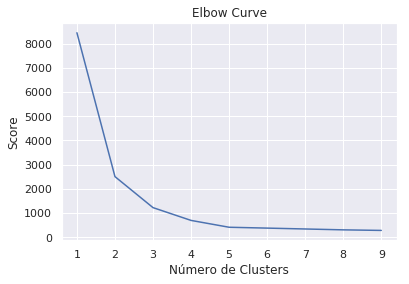

In [6]:
# El parámetro de entrada de K_means es el número de clusters a generar. Para saber cual es el número óptimo se 
# define la "Elbow Curve". El número óptimo es aquel en el que la curva se aplane (es decir, aunque aumente 
# el número de clusters no mejorará el resultado). Es buscar el "Elbow" (codo):

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
# El score es la suma de distancias desde los centroides hasta los puntos de su grupo (en negativo)
score = [-kmeans[i].fit(X).score(X) for i in range(len(kmeans))] 
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [7]:
#Para entender la diferencia probamos con 3, 5 y 7 clusters

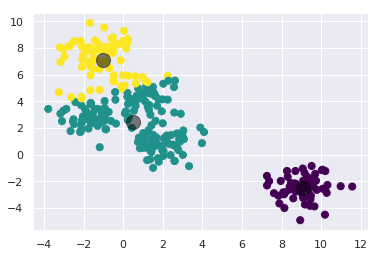

In [8]:
# Ejemplo con 3 clusters:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)
y_kmeans_3 = kmeans_3.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, s=50, cmap='viridis')

centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

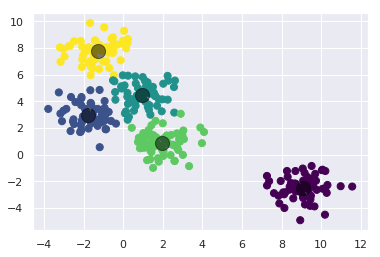

In [9]:
# Ejemplo con 5 clusters:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X)
y_kmeans_5 = kmeans_5.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_5, s=50, cmap='viridis')

centers = kmeans_5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

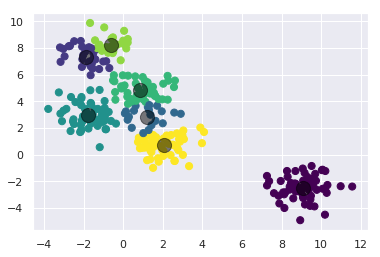

In [10]:
# Ejemplo con 7 clusters:
kmeans_7 = KMeans(n_clusters=7)
kmeans_7.fit(X)
y_kmeans_7 = kmeans_7.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_7, s=50, cmap='viridis')

centers = kmeans_7.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [13]:
# 1.2.- Análisis Espectral
#
# 
# Util cuando kmeans va mal. Por ejemplo dataset con simetrias circulares.
#
# En el spectral clustering se define el similarity graph (grafo de similitud). Para ello es necesario 
# definir una metrica de similitud. Puede ser por epsilon-neighbourhood, por k-nearest-neighbourhood
# o un fully connected graph.
#
# Despues se define la matriz Laplaciana, y se proyecta en una dimension menor.
#
# Por ultimo, se clusteriza el dato utilizando esta menor dimension.

## Tiene tres puntos relevantes:
# 1.- No se toma ninguna asunción sobre el dato (no se pide que la relacion sea ni lineal, ni cuadratica ni nada)
# 2.- Es muy rapido de implementar
# 3.- No es escalable

# Algoritmo:

# Input: Matriz de similitud y el número de clústers a construir.

#  1- Se construye la similarity graph por uno de los 3 algoritmos (epsilon, k-nearest, fully connected).
#  2- Se computa el Laplaciano no normalizado.
#  3- Se computa el primer autovector k.
#  4- Se clusterizan los datos.

# Output: Clusters

from sklearn.cluster import SpectralClustering 


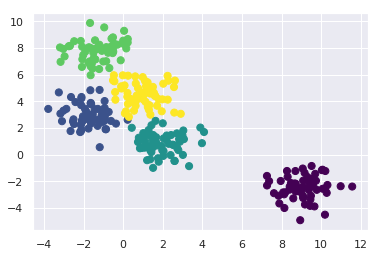

In [17]:
# Usando epsilon

spectral_model_rbf = SpectralClustering(n_clusters = 5, affinity ='rbf') 

y_spectral_model_rbf = spectral_model_rbf.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_spectral_model_rbf, s=50, cmap='viridis')

/home/kiko/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


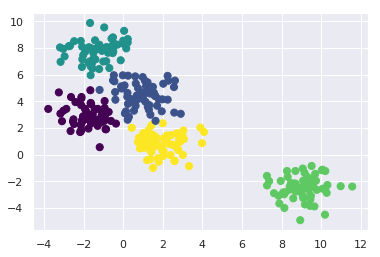

In [18]:
# Usando K-nearest

spectral_model_rbf = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors') 

y_spectral_model_rbf = spectral_model_rbf.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_spectral_model_rbf, s=50, cmap='viridis')